<a href="https://colab.research.google.com/github/cnddlf/2022_1_Study_AI/blob/main/%ED%98%95%ED%83%9C%EC%86%8C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. wordcloud

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob, os

path = '/content/drive/MyDrive/2022_1_Study_AI/2022_1_Study_AI/data/topics'
all_files = glob.glob(os.path.join(path, "*.data"))

In [3]:
# 파일 목록 만들기
filename_list = []

for file in all_files:
    # 경로 등 제거 후 순수 파일명만 저장
    filename_ = file.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)

filename_list

['performance_honda_accord_2008',
 'quality_toyota_camry_2007',
 'staff_bestwestern_hotel_sfo',
 'comfort_honda_accord_2008',
 'transmission_toyota_camry_2007',
 'free_bestwestern_hotel_sfo',
 'location_bestwestern_hotel_sfo',
 'location_holiday_inn_london',
 'rooms_bestwestern_hotel_sfo',
 'mileage_honda_accord_2008',
 'food_holiday_inn_london',
 'service_swissotel_hotel_chicago',
 'staff_swissotel_chicago',
 'service_bestwestern_hotel_sfo',
 'rooms_swissotel_chicago',
 'seats_honda_accord_2008',
 'interior_honda_accord_2008',
 'fonts_amazon_kindle',
 'bathroom_bestwestern_hotel_sfo',
 'navigation_amazon_kindle',
 'performance_netbook_1005ha',
 'price_amazon_kindle',
 'price_holiday_inn_london',
 'buttons_amazon_kindle',
 'eyesight-issues_amazon_kindle',
 'room_holiday_inn_london',
 'service_holiday_inn_london',
 'interior_toyota_camry_2007',
 'food_swissotel_chicago',
 'gas_mileage_toyota_camry_2007',
 'screen_ipod_nano_8gb',
 'sound_ipod_nano_8gb',
 'directions_garmin_nuvi_255W_gps'

In [4]:
import pandas as pd

opinion_text = []

for file in all_files:
    # 각 파일 데이터 프레임으로 생성 후 to_string으로 text화
    df = pd.read_table(file, index_col=None, header=0, encoding='latin1')
    opiniontext = df.to_string().replace("    ", "") # 첫 공백 제거
    opinion_text.append(opiniontext)
    
# 파일명, 파일내용을 데이터 프레임으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i..."
1,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ha...
2,staff_bestwestern_hotel_sfo,Staff are friendly and helpful .\n0 The...
3,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself..."
4,transmission_toyota_camry_2007,"After slowing down, transmission has to be k..."


In [5]:
document_df['opinion_text'][0]

"   Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long,  distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2I'm impressed with the performance as well as efficiency gains .\n3 It has room, performance, good MPG for its size and excellent reliability .\n4 For the record I test, drove the Lexus350 the BMW 5 series, the infiniti G35 and enjoyed the Honda performance equally for far less money !\n5Very happy with the car enjoy the ride and performance .\n6  The performance of the engine is very smooth .\n7   This car had rattles at 500 miles and has horrible performance even for a four cylinder .\n8Great performance and handling make this a real Winner !\n9Engine performance lacks punch after 60, head rest are poor design, lacks driver seat memory rear seat a c, radio system is marginal compared to Bose, Seats are hard and small for a large 

In [6]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [7]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('omw-1.4')
tfidf_vect = TfidfVectorizer(stop_words = 'english', ngram_range=(1, 2), tokenizer=LemNormalize, min_df=0.05, max_df=0.85)

opinion_text_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
opinion_text_vect

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


<51x4622 sparse matrix of type '<class 'numpy.float64'>'
	with 30886 stored elements in Compressed Sparse Row format>

In [9]:
# kmeans를 이용하여 클러스터가 7개인 군집화를 진행하고 label을 출력하시오
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=7, max_iter=1000, random_state=62)
km_cluster.fit(opinion_text_vect)

KMeans(max_iter=1000, n_clusters=7, random_state=62)

In [10]:
cluster_label = km_cluster.labels_
cluster_label
document_df['label'] = cluster_label
document_df

,filename,opinion_text,label
0,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i...",5
1,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ha...,5
2,staff_bestwestern_hotel_sfo,Staff are friendly and helpful .\n0 The...,0
3,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself...",5
4,transmission_toyota_camry_2007,"After slowing down, transmission has to be k...",5
5,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is ...,0
6,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0...",6
7,location_holiday_inn_london,Great location for tube and we crammed in a fa...,6
8,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless Co...",6
9,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks c...",5


In [11]:
for i in range(7):
  print(document_df[document_df['label']==i])
  print('='*40)

                       filename  \
2   staff_bestwestern_hotel_sfo   
5    free_bestwestern_hotel_sfo   
12      staff_swissotel_chicago   

                                         opinion_text  label  
2      Staff are friendly and helpful   .\n0   The...      0  
5     The wine reception is a great idea as it is ...      0  
12    The staff at Swissotel were not particularly...      0  
                      filename  \
16  interior_honda_accord_2008   
27  interior_toyota_camry_2007   

                                         opinion_text  label  
16     I love the new body style and the interior ...      1  
27  First of all, the interior has way too many ch...      1  
                       filename  \
20   performance_netbook_1005ha   
31          sound_ipod_nano_8gb   
33      keyboard_netbook_1005ha   
35        screen_netbook_1005ha   
36          video_ipod_nano_8gb   
38   battery-life_amazon_kindle   
39  battery-life_netbook_1005ha   
43   battery-life_ipod_nano_8gb   


In [12]:
# 클러스터를 3으로 지정하여 위의 과정을 실습해보시오.
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=1000, random_state=62)
km_cluster.fit(opinion_text_vect)

KMeans(max_iter=1000, n_clusters=3, random_state=62)

In [13]:
document_df.drop(['label'], axis=1, inplace=True)
document_df.head()

,filename,opinion_text
0,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i..."
1,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ha...
2,staff_bestwestern_hotel_sfo,Staff are friendly and helpful .\n0 The...
3,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself..."
4,transmission_toyota_camry_2007,"After slowing down, transmission has to be k..."


In [14]:
cluster_label = km_cluster.labels_
cluster_label
document_df['label'] = cluster_label
document_df

,filename,opinion_text,label
0,performance_honda_accord_2008,"Very happy with my 08 Accord, performance i...",0
1,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which ha...,0
2,staff_bestwestern_hotel_sfo,Staff are friendly and helpful .\n0 The...,1
3,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself...",0
4,transmission_toyota_camry_2007,"After slowing down, transmission has to be k...",0
5,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is ...,1
6,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0...",1
7,location_holiday_inn_london,Great location for tube and we crammed in a fa...,1
8,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless Co...",1
9,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks c...",0


In [15]:
for i in range(3):
  print(document_df[document_df['label']==i])
  print('='*40)

                          filename  \
0    performance_honda_accord_2008   
1        quality_toyota_camry_2007   
3        comfort_honda_accord_2008   
4   transmission_toyota_camry_2007   
9        mileage_honda_accord_2008   
15         seats_honda_accord_2008   
16      interior_honda_accord_2008   
27      interior_toyota_camry_2007   
29   gas_mileage_toyota_camry_2007   
37       comfort_toyota_camry_2007   

                                         opinion_text  label  
0      Very happy with my 08 Accord, performance i...      0  
1     I previously owned a Toyota 4Runner which ha...      0  
3     Drivers seat not comfortable, the car itself...      0  
4    After slowing down, transmission has to be  k...      0  
9     It's quiet, get good gas mileage and looks c...      0  
15  Front seats are very uncomfortable .\n0  No me...      0  
16     I love the new body style and the interior ...      0  
27  First of all, the interior has way too many ch...      0  
29  Ride seems

In [16]:
cluster_centers = km_cluster.cluster_centers_
cluster_centers.shape

(3, 4622)

In [17]:
cluster_centers[0].argsort()

array([2310, 2797, 2798, ..., 2730, 3630, 2281])

In [18]:
print(cluster_centers[0][2288])
print(cluster_centers[0][3486])

0.003799844996361358
0.014735503683577218


In [19]:
cluster_centers.argsort()[:]
cluster_centers.argsort()[:, 0]
cluster_centers.argsort()[:, ::-1]

array([[2281, 3630, 2730, ..., 2798, 2797, 2310],
       [3486, 2126, 3666, ..., 1560, 2274, 2288],
       [3590,  730, 2369, ..., 2347, 2344, 2310]])

In [20]:
cluster_centers_sort = cluster_centers.argsort()[:, ::-1]
cluster_centers_sort

array([[2281, 3630, 2730, ..., 2798, 2797, 2310],
       [3486, 2126, 3666, ..., 1560, 2274, 2288],
       [3590,  730, 2369, ..., 2347, 2344, 2310]])

In [21]:
top_keywords = cluster_centers_sort[0, :10]
top_keywords

array([2281, 3630, 2730, 1111, 1841, 1842, 4166,  940, 3044, 3260])

In [22]:
feature_names = tfidf_vect.get_feature_names()
feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '0 5',
 '0 room',
 '00',
 '02',
 '05',
 '06',
 '07',
 '08',
 '0i',
 '0the',
 '1 2',
 '1 block',
 '1 great',
 '10 did',
 '10 inch',
 '10 min',
 '10 minute',
 '10 room',
 '100',
 '100 accurate',
 '1005ha',
 '101',
 '102',
 '103',
 '104',
 '105',
 '105 room',
 '106',
 '106the',
 '107',
 '108',
 '109',
 '10it',
 '110',
 '111',
 '112',
 '113',
 '114',
 '114the',
 '115',
 '116',
 '117',
 '118',
 '119',
 '11the',
 '12 great',
 '120',
 '121',
 '121 hotel',
 '122',
 '123',
 '124',
 '125',
 '126',
 '126 staff',
 '127',
 '127the',
 '128',
 '129',
 '13',
 '130',
 '130the',
 '131',
 '131 room',
 '131we',
 '132',
 '133',
 '134',
 '134 room',
 '135',
 '135the',
 '136',
 '137',
 '138',
 '139',
 '139the',
 '13the',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '14the',
 '15 minute',
 '15 second',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '15the',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',

In [23]:
for idx in top_keywords:
  print(feature_names[idx])

interior
seat
mileage
comfortable
gas
gas mileage
transmission
car
performance
quality


In [24]:
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.8 MB/s 
     |████████████████████████████████| 453 kB 50.0 MB/s 


In [25]:
from konlpy.corpus import kolaw

kolaw.fileids()

['constitution.txt']

In [26]:
txt = kolaw.open('constitution.txt').read()
print(txt[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [27]:
from konlpy.corpus import kobill

kobill.fileids()

['1809896.txt',
 '1809898.txt',
 '1809899.txt',
 '1809890.txt',
 '1809894.txt',
 '1809893.txt',
 '1809892.txt',
 '1809897.txt',
 '1809891.txt',
 '1809895.txt']

In [28]:
txt = kobill.open('1809895.txt').read()
print(txt[:100])

하도급거래 공정화에 관한 법률 일부개정법률안

(유선호의원 대표발의 )

 의 안
 번 호

9895

발의연월일 : 2010.  11.  15.

발  의  자 : 유선호․강기갑


In [29]:
txt[:100]
from konlpy.tag import Hannanum

han = Hannanum()
han.nouns(txt[:100])

['하도급거래',
 '공정화',
 '법률',
 '일부개정법률안',
 '(유선호의원',
 '대표발',
 '의',
 '번',
 '9895',
 '발의연월일',
 '2010',
 '11',
 '15',
 '발',
 '의',
 '유선호․강기갑']

In [30]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.nouns(txt[:100])

['하도급',
 '하도급거래',
 '거래',
 '공정',
 '법률',
 '일부',
 '일부개정법률안',
 '개정',
 '법률안',
 '유',
 '유선호의원',
 '선호',
 '의원',
 '대표',
 '대표발의',
 '발의',
 '의',
 '안',
 '호',
 '9895',
 '발',
 '연월일',
 '2010',
 '11',
 '15',
 '자',
 '유선호',
 '강',
 '강기갑',
 '기갑']

In [31]:
from konlpy.tag import Komoran

komo = Komoran()
komo.nouns(txt[:100])

['하도급거래 공정화에 관한 법률',
 '일부',
 '개정',
 '법률',
 '안',
 '유선호',
 '의원',
 '대표',
 '발',
 '의',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '유선호',
 '강기갑']

In [32]:
from konlpy.tag import Okt
okt = Okt()
okt.nouns(txt[:100])

['하도급',
 '거래',
 '정화',
 '관',
 '법률',
 '일부',
 '개정',
 '법률',
 '안',
 '유선호',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '유선호',
 '강기갑']

In [33]:
okt.morphs(txt[:100])

['하도급',
 '거래',
 '공',
 '정화',
 '에',
 '관',
 '한',
 '법률',
 '일부',
 '개정',
 '법률',
 '안',
 '\n\n',
 '(',
 '유선호',
 '의원',
 '대표',
 '발의',
 ')',
 '\n\n ',
 '의',
 '안',
 '\n ',
 '번',
 '호',
 '\n\n',
 '9895',
 '\n\n',
 '발의',
 '연월일',
 ':',
 '2010',
 '.',
 '11',
 '.',
 '15',
 '.',
 '\n\n',
 '발',
 '의',
 '자',
 ':',
 '유선호',
 '․',
 '강기갑']

In [34]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [35]:
okt.pos(txt[:100])

[('하도급', 'Noun'),
 ('거래', 'Noun'),
 ('공', 'Modifier'),
 ('정화', 'Noun'),
 ('에', 'Josa'),
 ('관', 'Noun'),
 ('한', 'Josa'),
 ('법률', 'Noun'),
 ('일부', 'Noun'),
 ('개정', 'Noun'),
 ('법률', 'Noun'),
 ('안', 'Noun'),
 ('\n\n', 'Foreign'),
 ('(', 'Punctuation'),
 ('유선호', 'Noun'),
 ('의원', 'Noun'),
 ('대표', 'Noun'),
 ('발의', 'Noun'),
 (')', 'Punctuation'),
 ('\n\n ', 'Foreign'),
 ('의', 'Noun'),
 ('안', 'Noun'),
 ('\n ', 'Foreign'),
 ('번', 'Noun'),
 ('호', 'Noun'),
 ('\n\n', 'Foreign'),
 ('9895', 'Number'),
 ('\n\n', 'Foreign'),
 ('발의', 'Noun'),
 ('연월일', 'Noun'),
 (':', 'Punctuation'),
 ('2010', 'Number'),
 ('.', 'Punctuation'),
 ('11', 'Number'),
 ('.', 'Punctuation'),
 ('15', 'Number'),
 ('.', 'Punctuation'),
 ('\n\n', 'Foreign'),
 ('발', 'Noun'),
 ('의', 'Noun'),
 ('자', 'Noun'),
 (':', 'Punctuation'),
 ('유선호', 'Noun'),
 ('․', 'Foreign'),
 ('강기갑', 'Noun')]

In [36]:
words = okt.nouns(txt)
words[:20]

['하도급',
 '거래',
 '정화',
 '관',
 '법률',
 '일부',
 '개정',
 '법률',
 '안',
 '유선호',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발']

In [37]:
for word in words[:20]:
  if len(word)>1:
    print(word)

하도급
거래
정화
법률
일부
개정
법률
유선호
의원
대표
발의
발의
연월일


In [38]:
words_up2 = [n for n in words if len(n)>1]

In [39]:
from collections import Counter

counts = Counter(words_up2)
counts

Counter({'하도급': 6,
         '거래': 5,
         '정화': 3,
         '법률': 6,
         '일부': 3,
         '개정': 4,
         '유선호': 2,
         '의원': 2,
         '대표': 1,
         '발의': 2,
         '연월일': 1,
         '강기갑': 1,
         '김효석': 1,
         '조승수': 1,
         '최문순': 1,
         '조영택': 1,
         '문학진': 1,
         '백재현': 1,
         '송민순': 1,
         '박은수': 1,
         '정동영': 1,
         '김춘진': 1,
         '김재윤': 1,
         '우윤근': 1,
         '이성남': 1,
         '이종걸': 1,
         '제안': 1,
         '이유': 1,
         '내용': 1,
         '수급': 3,
         '사업자': 11,
         '사이': 1,
         '외형': 1,
         '계약': 3,
         '교섭': 2,
         '절대': 1,
         '우위': 1,
         '불공정': 1,
         '행위': 3,
         '가능성': 1,
         '상존': 1,
         '또한': 1,
         '부당행위': 1,
         '손해': 13,
         '경우': 8,
         '입증': 3,
         '부담': 1,
         '때문': 1,
         '민사소송': 1,
         '피해': 1,
         '제도': 1,
         '실정': 1,
         '서면': 1,
         '벌금': 2,
 

In [40]:
noun_lst = counts.most_common(40)
noun_lst[:15]

[('손해', 13),
 ('사업자', 11),
 ('경우', 8),
 ('인정', 7),
 ('하도급', 6),
 ('법률', 6),
 ('위반', 6),
 ('거래', 5),
 ('해당', 5),
 ('개정', 4),
 ('다음', 4),
 ('책임', 4),
 ('정화', 3),
 ('일부', 3),
 ('수급', 3)]

In [41]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (25.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [42]:
import matplotlib.font_manager as fm  # 폰트 관련 용도

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
for nanum in nanum_font:
  print(nanum)

sys_font number: 27
['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype

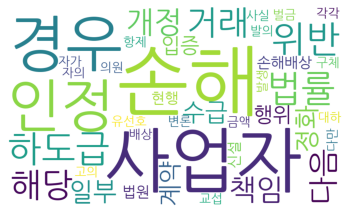

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width=1000, height=600, font_path=font_path, background_color='white')
plt.imshow(wc.generate_from_frequencies(dict(noun_lst)))
plt.axis('off')
plt.show()

#2. 네이버 영화 추천

In [44]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f3c6130fa50>)

In [45]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [46]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [47]:
train_data.dropna(how='any', inplace=True)
train_data.isnull().values.any()

False

In [48]:
train_data['document']=train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [49]:
from konlpy.tag import Okt

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


okt = Okt()
txt1 = okt.morphs(train_data['document'][1], stem=True)
txt2 = okt.morphs(train_data['document'][1], stem=False)

# print(txt1)
# print(txt2)

for word in txt1:
  if word in stopwords:
    print(word)

으로
와
들
이
하다
이
에
이
와
들
이


In [50]:
# 위의 내용을 이용하여 모든 후기의 불용어가 제거된 내용을 리스트에 저장하시오.
from konlpy.tag import Okt
# 진행 상태를 막대바로 표현하기 위한 함수
from tqdm import tqdm

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
  # stem은 True일 경우 원형을 찾아냄
  tokenized_sentence = okt.morphs(sentence, stem=True) #토큰화
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
  tokenized_data.append(stopwords_removed_sentence)

tokenized_data

100%|██████████| 199992/199992 [2:00:09<00:00, 27.74it/s]


[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '갈수',
  '있다',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '없다', '최고'],
 ['오다',
  '연기',
  '진짜',
  '개',
  '쩔다',
  '지루하다',
  '생각',
  '몰입',
  '보다',
  '다그',
  '래',
  '이렇다',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱하다', '밤하늘', '뜨다', '초승달', '같다', '영화'],
 ['사랑', '을', '해보다', '사람', '라면', '처음', '부터', '끝', '까지', '웃다', '영화'],
 ['완전', '감동', '이다', '보다', '감동'],
 ['개', '전쟁', '나오다', '나오다', '빠', '로', '보다'],
 ['굿'],
 ['바보', '아니다', '병', '쉬다'],
 ['내',
  '나이',
  '같다',
  '영화',
  '지금',
  '보다',
  '감동',
  '적',
  '이다',
  '하지만',
  '훗',
  '날다',
  '보다',
  '사하나',
  '하',
  '나',
  '그',
  '감정',
  '을',
  '완벽하다',
  '같다'],
 ['재밌다'],
 ['고질', '라니', '무', '귀엽다', '능', 'ㅋㅋ'],
 [

In [51]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window=5, min_count=5, workers=4, sg=0)
model.wv.vectors.shape

(17947, 100)

In [ ]:
model.wv.most_similar('한석규')

In [53]:
model.wv.most_similar('무협')

[('느와르', 0.8971478939056396),
 ('호러', 0.8646830916404724),
 ('첩보', 0.8564748764038086),
 ('히어로', 0.8557890057563782),
 ('블록버스터', 0.8450609445571899),
 ('멜로', 0.8351295590400696),
 ('슬래셔', 0.8266637325286865),
 ('정통', 0.8222494721412659),
 ('홍콩', 0.7973934412002563),
 ('최고봉', 0.7932289242744446)]

In [54]:
model.wv.most_similar('몰입')

[('집중', 0.9034193754196167),
 ('감정이입', 0.7395524382591248),
 ('긴장', 0.6608971357345581),
 ('몰입도', 0.6601723432540894),
 ('긴박', 0.6464461088180542),
 ('연결', 0.6374142169952393),
 ('이해도', 0.6116388440132141),
 ('흥미진진', 0.6068410873413086),
 ('박진', 0.6003146767616272),
 ('정선', 0.5969738960266113)]

[('집중', 0.9034193754196167),
 ('감정이입', 0.7395524382591248),
 ('긴장', 0.6608971357345581),
 ('몰입도', 0.6601723432540894),
 ('긴박', 0.6464461088180542),
 ('연결', 0.6374142169952393),
 ('이해도', 0.6116388440132141),
 ('흥미진진', 0.6068410873413086),
 ('박진', 0.6003146767616272),
 ('정선', 0.5969738960266113)]